<h1><center>LUNG CANCER IMAGE CLASSIFICATION</center></h1>

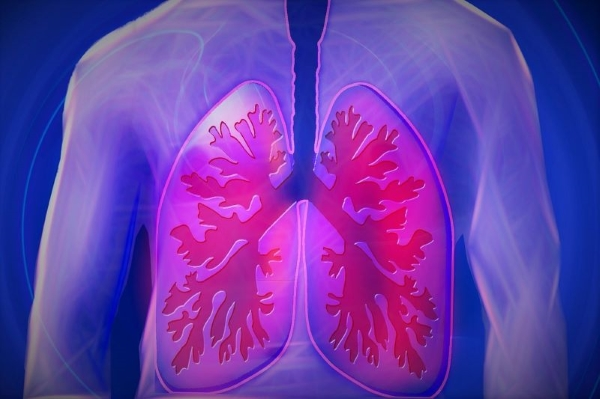

## EXECUTIVE SUMMARY

The aim of this project was to create machine learning models to predict if someone could have lung cancer based on X-Ray images. 

The lung cancer dataset was downloaded from [here](https://data.mendeley.com/datasets/bhmdr45bh2/1) as a zip file. After the zip file was extracted, the **Bengin cases**, **Malignant cases** and **Normal cases** directories were renamed to **benign**, **malignant** and **normal** respectively.The renamed directories were then copied to the **data** directory of this project, where the names of the folders would represent the labels.

The image files in the **benign**, **malignant** and **normal** directories (located in the **data** directory of this project) were opened using the **Pillow** library and then converted to **NumPy** arrays for creating the models.

A **class** representing several machine learning models was created, which was then used to create the models.

After creating the models, the accuracy metrics of each model i.e. the **Accuracy Score**, the **F1 Score** and **Jaccard Score** was compared to determine which model was the most accurate. 

It was determined that the **Logistic Regression** model was the most accurate model with an accuracy score of 94 %, an F1 score of 94 % and a Jaccard score of 89 %, followed by the **Multilayer Perceptron**, **K-Nearest Neighbor**, **Random Forest** and **Gaussian Naive-Bayes** in that order.

## TABLE OF CONTENTS
* [INTRODUCTION](#introduction)
* [METHODOLOGY](#methodology)
    * [INSTALLING AND IMPORTING LIBRARIES](#installing_importing_libraries)
    * [DATA COLLECTION](#data_collection)
    * [DATA PREPROCESSING](#data_preprocessing)
    * [MODEL CREATION](#model_creation) 
    * [MODEL EVALUATION](#model_evaluation)
* [DISCUSSION](#discussion)
* [CONCLUSION](#conclusion)
* [REFERENCES](#references)
* [APPENDIX](#appendix)

## INTRODUCTION <a class="anchor" id="introduction"></a>

Lung cancer is a type of cancer which begins the lungs (usually in the bronchi, bronchioles, or small air sacs). It is caused by uncontrolled cell division, where cells divide to produce more copies of themselves as part of their normal function. But, sometimes, they mutate which causes them to keep dividing when they shouldn't. Damaged cells dividing uncontrollably creates tumors, that will eventually prevent the organ from operating properly. [[1]](#1) 

There are 5 stages of lung cancer:

**Stage 0 (in-situ)**: Cancer is in the top lining of the lung or bronchus. It hasn't spread to other parts of the lung or outside of the lung.

**Stage I**: Cancer has not spread outside of the lung.

**Stage II**: Cancer is larger than Stage I, has spread to lymph nodes inside the lung, or there are multiple tumors in the same lobe of the lung.

**Stage III**: Cancer is larger than Stage II, has spread to nearby lymph nodes or structures, or there are multiple tumors in a different lobe of the same lung.

**Stage IV**: Cancer has spread to the other lung, the fluid around the lung, the fluid around the heart or distant organs.<br>

The presence of lung cancer is detected using imaging tests such as X-Rays, Computed Tomography (CT) scans and Magnetic Resonance Imaging (MRI) scans. These imaging tests creates images of the internal structure of the body to observe the suspicious areas that might be cancer, understand the extent of the cancer, monitor the effectiveness of the treatment and to detect possible signs of cancer returning after treatment. A chest X-Ray is often the first test that the medical professional will perform to detect any abnormal areas in the lungs. If any abnormal areas are detected, more tests may be performed. [[2]](#2) 

**Problem Statement: To create machine learning models to predict if someone could have lung cancer based on X-Ray images.**

## METHODOLOGY <a class="anchor" id="methodology"></a>

1. [Installing and importing libraries](#installing_importing_libraries) - The required libraries were installed and imported.
2. [Data Collection](#data_collection) - The lung cancer dataset was downloaded from [here](https://data.mendeley.com/datasets/bhmdr45bh2/1) as a zip file. After the zip file was extracted, the **Bengin cases**, **Malignant cases** and **Normal cases** directories were renamed to **benign**, **malignant** and **normal** respectively.The renamed directories were then copied to the **data** directory of this project, where the names of the folders would represent the labels.
3. [Data Preprocessing](#data_preprocessing) - The image files in the **benign**, **malignant** and **normal** directories (located in the **data** directory of this project) were opened using the **Pillow** library and then converted to **NumPy** arrays for creating the models.
5. [Model Creation](#model_creation) - A **class** representing several machine learning models was created, which was then used to create the models.
6. [Model Evaluation](#model_evaluation) - The accuracy metrics of each model i.e. the **Accuracy Score**, the **F1 Score** and **Jaccard Score** was compared to determine which model was the most accurate.

### INSTALLING AND IMPORTING LIBRARIES <a class="anchor" id="installing_importing_libraries"></a>

**The required libraries were installed.**

The command to install packages/libraries are: **! pip install [library]** 

The following libraries were installed: **NumPy**, **Pandas**, **Matplotlib**, **Seaborn**, **Scikit-Learn** and **Pillow**.

In [29]:
! pip install numpy
! pip install pandas
! pip install matplotlib
! pip install seaborn
! pip install scikit-learn
! pip install pillow

**The required libraries were imported.**

For this project, the only external libraries that were required were: NumPy, Pandas, Matplotlib, Seaborn, Scikit-Learn and Pillow. Some standard libraries were also imported.

In [30]:
import os  # For interacting with the operating system e.g. checking if a file exists and listing the contents of a directory.
import sys # For terminating the program.

from PIL import Image # Library for image manipulation.

import numpy as np # Library for utlizing high performance arrays.
import pandas as pd # Library for data cleaning, manipulation and analysis.

import matplotlib.pyplot as plt # Library for data visualization.
import seaborn as sns # Library for data visualization.

from sklearn.preprocessing import StandardScaler # For data standardization.
from sklearn.model_selection import train_test_split # For splitting the data into training and testing sets.
from sklearn.model_selection import GridSearchCV # For determining the best hyperparameters of the models.

# Accuracy metrics for evaluating the models.
from sklearn.metrics import accuracy_score # For determining the accuracy score of the models.
from sklearn.metrics import f1_score # For determining the F1 score of the models.
from sklearn.metrics import jaccard_score # For determining the Jaccard score of the models.

# Classification models.
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbor (KNN) Model.
from sklearn.linear_model import LogisticRegression # Logistic Regression Model.
from sklearn.ensemble import RandomForestClassifier # Random Forest Model.
from sklearn.naive_bayes import GaussianNB # Gaussian Naive-Bayes Model.
from sklearn.neural_network import MLPClassifier # Multilayer Perceptron (MLP) Model.

import pickle # For saving and laoding the models.

### DATA COLLECTION <a class="anchor" id="data_collection"></a>

The lung cancer dataset was downloaded from [here](https://data.mendeley.com/datasets/bhmdr45bh2/1) as a zip file. After extracting the zip file, a directory called "The IQ-OTHNCCD lung cancer dataset" was created.

The contents of the "The IQ-OTHNCCD lung cancer dataset" directory were as follows:
* **Bengin cases**
* **Malignant cases**
* **Normal cases**
* **IQ-OTH_NCCD lung cancer dataset.txt**

The "IQ-OTH_NCCD lung cancer dataset.txt" is a text file containing a description of the dataset.

The **Bengin cases**, **Malignant cases** and **Normal cases** directories were renamed to **benign**, **malignant** and **normal** respectively.

The renamed directories were then copied to the **data** directory of this project.

Also, the renamed directories would be used as **labels** for the images.

### DATA PREPROCESSING <a class="anchor" id="data_preprocessing"></a>

The image files for this project would be stored in the **data** directory in this project.

In [31]:
base_path = 'data' # Path where the image files are located.

The names of the subdirectories in the **data** directory (i.e. **benign**, **malignant** and **normal**) were extracted and stored in a list. These names would be used as labels for the images.

In [32]:
if os.path.exists(base_path): # Checks if the base path exist.
    content = os.listdir(base_path) # Stores the content of the path in a list.
    
    categorical_labels = [] # List to store the categorical labels.
    
    if content: # Checks if there are any elements in the "content" list.
        for item in content: # Iterates through each item in the "content" list.
            if '.' not in item: # Checks if the item does not have a file extension.
                categorical_labels.append(item) # Appends the item to the "categorical_labels" list.
            else:
                print(f'\"{item}\" is not a directory.') # Displays a message stating that the item is not a directory.
    else:
        print(f'The "{base_path}" directory is empty.') # Displays a message that the path to store the image files is empty.
        print('Program terminated...') # Displays a message stating that the program is terminated.
        sys.exit() # Terminates the program.
else:
    print(f'The \"{base_path}\" directory does not exist.') # Displays a message stating that the base path does not exist.
    print('Program terminated...\n') # Displays a message stating that the program is terminated.
    sys.exit() # Terminates the program.

Since the machine learning models cannot accept categorical (text) labels, it was converted into **numerical** labels.

A dictionary was created to store the categorical labels with the corresponding **numerical** labels.

In [33]:
labels = {} # Dictionary to store the categoricaL labels with the corresponding numerical labels.

# Iterates through each index and value in the "categorical_labels" list.
for numerical_label, categorical_label in enumerate(categorical_labels): 
    # Stores the categorical label and the numerical label in the "labels" dictionary.
    labels[categorical_label] = numerical_label 

# Displays a message stating the categorical and numerical labels.
print('The categorical labels with their corresponding numerical labels are as follows:\n')
# Iterates through each categorical label and the numerical label in the "labels" dictionary.
for categorical_label, numerical_label in labels.items():  
    # Displays the categorical label with it's corresponding numerical label.
    print(f'{categorical_label} -> {numerical_label}') 

The categorical labels with their corresponding numerical labels are as follows:

benign -> 0
malignant -> 1
normal -> 2


A CSV file containing the categorical labels and numerical labels was created and saved in the project directory.

In [34]:
categorical_labels = labels.keys() # Stores the categorical labels in a list.
numerical_labels = labels.values() # Stores the numerical labels in a list.
# Creates a dictionary to store the "categorical_labels" list and the "numerical_labels" list.
labels_dict = {'categorical_label': categorical_labels, 'numerical_label': numerical_labels}

labels_df = pd.DataFrame(labels_dict) # Creates a Pandas DataFrame from the "labels_dict" dictionary.
labels_df.to_csv('labels.csv', index=False) # Saves the Pandas DataFrame as a CSV file in the project directory.

The paths of each file in the **benign**, **malignant** and **normal** directories were extracted and stored in 3 lists.

A dictionary was created to store the lists with the corresponding labels.

In [35]:
files = {} # Dictionary to store the lists of the files with the corresponding label.

for label in labels: # Iterates through each label in the "labels" dictionary.
    path = os.path.join(base_path, label) # Joins the base path with the label.
    content = os.listdir(path) # Stores the content of the path in a list.
    files[label] = [] # List to store the path of the image files for that label.
    for file in content: # Iterates through each filename.
        filename = os.path.join(path, file) # Joins the path with the filename.
        files[label].append(filename) # Appends  the path of the file to the list in the dictionary.

The image files for each label (i.e. **benign**, **malignant** and **normal**) were opened and its content was converted into  **NumPy** arrays.

A dictionary was created to store the lists of NumPy arrays with the corresponding label.

In [36]:
data = {} # Dictionary to store the image files as numpy arrays.

for label, content in files.items(): # Iterates through each label and the list of files in the "files" dictionary.
    data[label] = [] # List to store the image files as numpy arrays, for that label.
    for file in content: # Iterates through each file path for that label.
        if file.endswith('.png') or file.endswith('.jpg'): # Checks if the file path ends with a PNG or JPG file extension.
            img = Image.open(file) # Opens the image file.
            numpy_data = np.asarray(img) # Converts the image file to a numpy array.
            data[label].append(numpy_data) # Stores the numpy data of the image in the list.
        else:
            # Displays a message stating that the file does not end with a PNG or JPG file extension.
            print(f'{file} does not end with a PNG or JPG file extension.')
            continue # Skips the current iteration.

All of the image NumPy arrays were **resized** to the same dimensions (width and height) for the model creation.

The dimensions (width and height) were saved to a text file.

A dictionary was created to store the lists of resized NumPy arrays with the corresponding label.

In [37]:
width = 32 # Resized image height (in pixels).
height = 32 # Resized image width (in pixels).

In [38]:
filename = 'image_size.txt' # Name of text file to save the dimensions (width and height).

with open(filename, 'w') as f: # Creates a new text file to save the dimensions.
    f.write(f'{width}\n') # Writes the width into the text file.
    f.write(f'{height}\n') # Writes the height into the text file.
    
print(f'The width and height were saved to "{filename}"')

The width and height were saved to "image_size.txt"


In [39]:
data_resized = {} # Dictionary to store the reszied image files as numpy arrays.
 
for label, numpy_arrays in data.items(): # Iterates through each label and the list of numpy arrays.
    data_resized[label] = [] # List to store the resized numpy array for that label.
    for numpy_array in numpy_arrays: # Iterates through each image numpy array for the label.
        # Resizes the image numpy array to the specified height and width, with 3 color channels (i.e. Red, Green and Blue)
        resized_image = np.resize(numpy_array, (height, width, 3)) 
        data_resized[label].append(resized_image) # Appends the resized image numpy array to the list.

All of the image NumPy arrays and their corresponding numerical labels were **appended** to separate lists (one list for the features and the other list for the labels).

The list containing the features was converted into a multi-dimensional NumPy array and then **reshaped** into a 2 dimensional array.

The list containing the labels was converted into a single dimensional NumPy array.

In [40]:
input_values = [] # List to store all the combined numpy arrays for the input values.
output_values = [] # List to store all the output values (numerical labels).

try:
    # Iterates  through each label with the corresponding list of resized numpy arrays.
    for label, numpy_arrays_resized in data_resized.items(): 
        input_values += numpy_arrays_resized # Appends each resized image numpy array to the "input_values" list. 
        # Determines te numerical label, creates a list to store the amount of numerical lables for that label, and appends the list to the "output_values" list.
        output_values += len(numpy_arrays_resized) * [labels[label]] 

    X_numpy_arrays = np.asarray(input_values) # Converts the "input_values" list into a mult-dimensional numpy array.

    X = [] # List to store the features.
    number_columns_X = height * width * 3 # Number of columns for X.
    for X_numpy_array in X_numpy_arrays: # Iterates through each element in the "X_numpy_arrays" list.
        # Reshapes the multi-dimensional numpy array into a 2 dimensional numpy array for the features and then appends it to the "X" list.
        X.append(np.reshape(X_numpy_array, (number_columns_X,))) 
    
    X = np.asarray(X) # Converts the features (X) list to a single dimension numpy array.
    y = np.asarray(output_values) # Converts the "output_values" list into a single dimension numpy array.
except MemoryError:
    # Displays a message stating that there is not enough memory to resize the images with the speicified height and width.
    print(f'There is not enough memory to resize the images to a height of {height} pixels and a width of {width} pixels.')
    print(f'Please resize the image using smaller dimensions.') # Displays a message to resize the image using smaller dimensions.
    print('Terminating program...') # Displays a message stating that the program is being terminated.
    sys.exit() # Terminates the program.

### MODEL CREATION <a class="anchor" id="model_creation">

A **class** was created to represent 5 classification models:
* K-Nearest Neighbors (KNN)
* Logistic Regression
* Random Forest
* Guassian Naive-Bayes
* Multilayer Perceptron (MLP)

The hyperparameters of each model were tuned using the **GridSearchCV** object to increase the accuracy.

In [41]:
class ClassificationModels:
    '''Class representing different classification models.'''
    def __init__(self, X, y):
        '''Initializes the features (X) and the target (y), as well as other attributes.'''
        self.X = X # Features
        self.y = y # Target
        
        self.models = {} # Dictionary to store models.
        self.model_accuracies = [] # List to store the accuracies of the models.
    
    def standardize_data(self):
        '''Standardizes the features by removing the mean and scaling to unit variance.'''
        scaler = StandardScaler() # Creates a StandardScaler object for data standardization.
        self.X = scaler.fit_transform(self.X) # Fits the features to the StandardScaler object, and returns the scaled data.
        
    def split_data(self):
        '''Splits the data into training and testing sets.'''
        # Split the data into training and testing sets with a test size of 20%, and a random state of 2.
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=2)
        
    def logistic_regression_model(self):
        '''Creates and fit a Logistic Regression model using GridSearchCV.'''
        # Logisitic Regression parameters for determining best hyperparameters.
        parameters = {'C': [0.01,0.1,1], 
                      'penalty': ['l2'], 
                      'solver': ['lbfgs'], 
                      'max_iter': [10000]}
        
        logistic_regression_model = LogisticRegression() # Creates a Logistic Regression model.

        # Creates a GridSearchCV object with the Logistic Regression model and its parameters, with 10 cross validations.
        logistic_regression_cv = GridSearchCV(logistic_regression_model, parameters, scoring='accuracy', cv=10) 
        logistic_regression_cv.fit(self.X_train, self.y_train) # Fits the GridSearchCV object using the training data.

        y_pred = logistic_regression_cv.predict(self.X_test) # Creates model predictions using the testing data.
        
        self.models['logistic_regression'] = logistic_regression_cv # Stores the Logistic Regression model in the "models" attribute.
        
        # Calculates different accuracy metrics using the test data.
        logistic_regression_accuracy_score = accuracy_score(self.y_test, y_pred) # Evaluate the accuracy score of the model.
        logistic_regression_f1_score = f1_score(self.y_test, y_pred, average='weighted') # Evaluate the F1 score of the model.
        logistic_regression_jaccard_score = jaccard_score(self.y_test, y_pred, average='weighted') # Evaluate the Jaccard score of the model.
        logsitic_regression_best_hyperparameters = logistic_regression_cv.best_params_ # Best hyperparameters of the model.
        
        logistic_regression_accuracies = {} # Dicionary to store each accuracy metric of the Logistic Regression model.
        
        # Stores the name of the model in the "logistic_regression_accuracies" dictionary.
        logistic_regression_accuracies['Model'] = 'Logistic Regression'
        # Stores the accuracy score of the model in the "logistic_regression_accuracies" dictionary.
        logistic_regression_accuracies['Accuracy Score'] = logistic_regression_accuracy_score 
        # Stores the F1 score of the model in the "logistic_regression_accuracies" dictionary.
        logistic_regression_accuracies['F1 Score'] = logistic_regression_f1_score
        # Stores the Jaccard score of the model in the "logistic_regression_accuracies" dictionary.
        logistic_regression_accuracies['Jaccard Score'] = logistic_regression_jaccard_score
        # Stores the best hyperparameters of the model in the "logistic_regression_accuracies" dictionary.
        logistic_regression_accuracies['Best Hyperparameters'] = logsitic_regression_best_hyperparameters
        
        # Appends the "logistic_regression_accuracies" dictionary to the "self.model_accuracies" list.
        self.model_accuracies.append(logistic_regression_accuracies) 
       
    def random_forest_model(self):
        '''Creates and fit a Random Forest model using GridSearchCV.'''
        # Random Forest parameters for determining best hyperparemeters.
        parameters = {'bootstrap': [True, False], 
                      'max_depth': [2, 4], 
                      'max_features': ['auto', 'sqrt'], 
                      'min_samples_leaf': [1, 2], 
                      'min_samples_split': [2, 5],
                      'n_estimators': [100, 200]}
        
        random_forest_model = RandomForestClassifier() # Creates a Random Forest model.
        
        # Creates a GridSearchCV object with the Random Forest model and its parameters, with 10 cross validations.
        random_forest_cv = GridSearchCV(random_forest_model, parameters, scoring='accuracy', cv=10)
        random_forest_cv.fit(self.X_train, self.y_train) # Fits the GridSearchCV object using the training data.
        
        y_pred = random_forest_cv.predict(self.X_test) # Creates model predictions using the test data.
        
        self.models['random_forest'] = random_forest_cv # Stores the Random Forest model in the "models" attribute.
        
        # Calculates different accuracy metrics using the testing data.
        random_forest_accuracy_score = accuracy_score(self.y_test, y_pred) # Evaluate the accuracy score of the model.
        random_forest_f1_score = f1_score(self.y_test, y_pred, average='weighted') # Evaluate the F1 score of the model.
        random_forest_jaccard_score = jaccard_score(self.y_test, y_pred, average='weighted') # Evaluate the Jaccard score of the model.
        random_forest_best_hyperparameters = random_forest_cv.best_params_ # Best hyperparameters of the model.
        
        random_forest_accuracies = {} # Dicionary to store each accuracy metric of the Random Forest model.
        
        # Stores the name of the model in the "random_forest_accuracies" dictionary.
        random_forest_accuracies['Model'] = 'Random Forest'
        # Stores the accuracy score of the model in the "random_forest_accuracies" dictionary.
        random_forest_accuracies['Accuracy Score'] = random_forest_accuracy_score 
        # Stores the F1 score of the model in the "random_forest_accuracies" dictionary.
        random_forest_accuracies['F1 Score'] = random_forest_f1_score
        # Stores the Jaccard score of the model in the "random_forest_accuracies" dictionary.
        random_forest_accuracies['Jaccard Score'] = random_forest_jaccard_score
        # Stores the best hyperparameters of the model in the "random_forest_accuracies" dictionary.
        random_forest_accuracies['Best Hyperparameters'] = random_forest_best_hyperparameters
        
        # Appends the "random_forest_accuracies" dictionary to the "self.model_accuracies" list.
        self.model_accuracies.append(random_forest_accuracies) 
        
    def gaussian_naive_bayes_model(self):
        '''Creates and fits a Gaussian Naive-Bayes model using GridSearchCV.'''
        # Gaussian Naive-Bayes Parameters for determining best hyperparameters.
        parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
        
        gaussian_naive_bayes_model = GaussianNB() # Creates a Gaussian Naive-Bayes model.
        # Creates a GridSearchCV object with the Gaussian Naive-Bayes model and its parameters, with 10 cross validations.
        gaussian_naive_bayes_cv = GridSearchCV(gaussian_naive_bayes_model, parameters, scoring='accuracy', cv=10)
        gaussian_naive_bayes_cv.fit(self.X_train, self.y_train) # Fits the GridSearchCV object using the training data.
        
        y_pred = gaussian_naive_bayes_cv.predict(self.X_test) # Creates model predictions using the test data.
        
        # Stores the Gaussian Naive-Bayes model in the "models" attribute.
        self.models['gaussian_naive_bayes'] = gaussian_naive_bayes_cv 
        
        # Calculates different accuracy metrics using the test data.
        gaussian_nb_accuracy_score = accuracy_score(self.y_test, y_pred) # Evaluate the accuracy score of the model.
        gaussian_nb_f1_score = f1_score(self.y_test, y_pred, average='weighted') # Evaluate the F1 score of the model.
        gaussian_nb_jaccard_score = jaccard_score(self.y_test, y_pred, average='weighted') # Evaluate the Jaccard score of the model.
        gaussian_nb_best_hyperparameters = gaussian_naive_bayes_cv.best_params_ # Best hyperparameters of the model.
        
        gaussian_nb_accuracies = {} # Dicionary to store each accuracy metric of the Gaussian Naive-Bayes model.
        
        # Stores the name of the model in the "gaussian_nb_accuracies" dictionary.
        gaussian_nb_accuracies['Model'] = 'Gaussian Naive-Bayes'
        # Stores the accuracy score of the model in the "gaussian_nb_accuracies" dictionary.
        gaussian_nb_accuracies['Accuracy Score'] =  gaussian_nb_accuracy_score 
        # Stores the F1 score of the model in the "gaussian_nb_accuracies" dictionary.
        gaussian_nb_accuracies['F1 Score'] = gaussian_nb_f1_score
        # Stores the Jaccard score of the model in the "gaussian_nb_accuracies" dictionary.
        gaussian_nb_accuracies['Jaccard Score'] = gaussian_nb_jaccard_score
        # Stores the best hyperparameters of the model in the "gaussian_nb_accuracies" dictionary.
        gaussian_nb_accuracies['Best Hyperparameters'] = gaussian_nb_best_hyperparameters
        
        # Appends the "gaussian_nb_accuracies" dictionary to the "self.model_accuracies" list.
        self.model_accuracies.append(gaussian_nb_accuracies) 
    
    def knn_model(self):
        '''Creates and fits a K-Nearest Neighbors (KNN) model using GridSearchCV.'''
        # KNN Parameters for determining best hyperparameters.
        parameters = {'n_neighbors': list(range(1, 11)), 
                      'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
                      'p': [1,2]}
        
        knn_model = KNeighborsClassifier() # Creates a KNN model.
        # Creates a GridSearchCV object with the KNN model and its parameters, with 10 cross validations.
        knn_cv = GridSearchCV(knn_model, parameters, scoring='accuracy', cv=10)
        knn_cv.fit(self.X_train, self.y_train) # Fits the GridSearchCV object using the training data.
        
        y_pred = knn_cv.predict(self.X_test) # Creates model predictions using the test data.
        
        self.models['k_nearest_neighbor'] = knn_cv # Stores the KNN model in the "models" attribute.
        
        # Calculates different accuracy metrics using the test data.
        knn_accuracy_score = accuracy_score(self.y_test, y_pred) # Evaluate the accuracy score of the model.
        knn_f1_score = f1_score(self.y_test, y_pred, average='weighted') # Evaluate the F1 score of the model.
        knn_jaccard_score = jaccard_score(self.y_test, y_pred, average='weighted') # Evaluate the Jaccard score of the model.
        knn_best_hyperparameters = knn_cv.best_params_ # Best hyperparameters of the model.
        
        knn_accuracies = {} # Dicionary to store each accuracy metric of the KNN model.
        
        # Stores the name of the model in the "knn_accuracies" dictionary.
        knn_accuracies['Model'] = 'K-Nearest Neighbors (KNN)'
        # Stores the accuracy score of the model in the "knn_accuracies" dictionary.
        knn_accuracies['Accuracy Score'] = knn_accuracy_score 
        # Stores the F1 score of the model in the "knn_accuracies" dictionary.
        knn_accuracies['F1 Score'] = knn_f1_score
        # Stores the Jaccard score of the model in the "knn_accuracies" dictionary.
        knn_accuracies['Jaccard Score'] = knn_jaccard_score
        # Stores the best hyperparameters of the model in the "knn_accuracies" dictionary.
        knn_accuracies['Best Hyperparameters'] = knn_best_hyperparameters
        
        # Appends the "knn_accuracies" dictionary to the "self.model_accuracies" list.
        self.model_accuracies.append(knn_accuracies) 
                                  
    def mlp_model(self):
        '''Creates and fits a Multilayer Perceptron (MLP) model using GridSearchCV.'''
        # MLP Parameters for determining best hyperparameters.
        parameters = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
                      'activation': ['tanh', 'relu'],
                      'solver': ['sgd', 'adam'],
                      'alpha': [0.0001, 0.05, 0.1],
                      'learning_rate': ['constant','adaptive']}
        
        mlp_model = MLPClassifier(max_iter=1000) # Creates a MLP model with 1000 iterations (epochs).
        # Creates a GridSearchCV object with the MLP model and its parameters, with 10 cross validations.
        mlp_cv = GridSearchCV(mlp_model, parameters, scoring='accuracy', cv=10)
        mlp_cv.fit(self.X_train, self.y_train) # Fits the GridSearchCV object using the training data.
        
        y_pred = mlp_cv.predict(self.X_test) # Creates model predictions using the test data.
        
        self.models['multi_layer_perceptron'] = mlp_model # Stores the MLP model in the "models" attribute.
        
        # Calculates different accuracy metrics using the test data.
        mlp_accuracy_score = accuracy_score(self.y_test, y_pred) # Evaluate the accuracy score of the model.
        mlp_f1_score = f1_score(self.y_test, y_pred, average='weighted') # Evaluate the F1 score of the model.
        mlp_jaccard_score = jaccard_score(self.y_test, y_pred, average='weighted') # Evaluate the Jaccard score of the model.
        mlp_best_hyperparameters = mlp_cv.best_params_ # Best hyperparameters of the model.
        
        mlp_accuracies = {} # Dicionary to store each accuracy metric of the MLP model.
        
        # Stores the name of the model in the "mlp_accuracies" dictionary.
        mlp_accuracies['Model'] = 'Multi Layer Perceptron (MLP)'
        # Stores the accuracy score of the model in the "mlp_accuracies" dictionary.
        mlp_accuracies['Accuracy Score'] = mlp_accuracy_score 
        # Stores the F1 score of the model in the "mlp_accuracies" dictionary.
        mlp_accuracies['F1 Score'] = mlp_f1_score
        # Stores the Jaccard score of the model in the "mlp_accuracies" dictionary.
        mlp_accuracies['Jaccard Score'] = mlp_jaccard_score
        # Stores the best hyperparameters of the model in the "mlp_accuracies" dictionary.
        mlp_accuracies['Best Hyperparameters'] = mlp_best_hyperparameters
        
        # Appends the "mlp_accuracies" dictionary to the "self.model_accuracies" list.
        self.model_accuracies.append(mlp_accuracies) 

An instance of the **ClassificationModels** class was created for model development and training.

In [42]:
models = ClassificationModels(X,y) # Creates an instance of the ClassificationModels class for model development and training.

The **features (X)** was standardized using a **StandardScaler** object, which removes the mean and scales to unit variance.

In [43]:
try:
    models.standardize_data() # Standardizes the data using the StandardScaler object.
except MemoryError:
    # Displays a message stating that there is not enough memory to resize the images with the speicified height and width.
    print(f'There is not enough memory to resize the images to a height of {height} pixels and a width of {width} pixels.')
    print(f'Please resize the image using smaller dimensions.') # Displays a message to resize the image using smaller dimensions.
    print('Terminating program...') # Displays a message stating that the program is being terminated.
    sys.exit() # Terminates the program.

The data was split into **training** and **testing** sets using the **split_data** method.
80% of the data wil be used for training and 20% of the data will be used for testing.

In [44]:
models.split_data() # Splits the data into training and testing sets.

A **K-Nearest Neighbor (KNN)** model was created using the data.

In [45]:
models.knn_model() # Creates and trains a KNN model.

A **Logistic Regression** model was created using the data.

In [46]:
models.logistic_regression_model() # Creates and trains a Logistic Regression model.

A **Random Forest** model was created using the data.

In [47]:
models.random_forest_model() # Creates and trains a Random Forest model.

A **Gaussian Naive-Bayes** model was created using the data.

In [48]:
models.gaussian_naive_bayes_model() # Creates and trains a Gaussian Naive-Bayes model.

A **Multlayer Perceptron** model was created using the data.

In [ ]:
models.mlp_model() # Creates and trains a Multilayer Perceptron model.

### MODEL EVALUATION <a class="anchor" id="model_evaluation">

A pandas **DataFrame** was created using the **model_accuracies** attribute in the **models** instance.

In [49]:
# Creates a Pandas DataFrame using the "model_accuracies" attribute in the "models" instance.
model_accuracies_df = pd.DataFrame(models.model_accuracies) 

The **model_accuracies_df** DataFrame was saved to a CSV file in the project directory.

In [50]:
# Saves the "models_accuaracies_df" DataFrame to a CSV file in the project directory.
model_accuracies_df.to_csv('model_accuracies.csv', index=False)

The contents of the **model_accuracies_df** DataFrame are displayed.

In [51]:
model_accuracies_df.reset_index(drop=True, inplace=True) # Removes the index column from the "model_accuracies_df" DataFrame.
model_accuracies_df # Displays the rows in the "model_accuracies_df" DataFrame.

,Model,Accuracy Score,F1 Score,Jaccard Score,Best Hyperparameters
0,K-Nearest Neighbors (KNN),0.840909,0.834042,0.718244,"{'algorithm': 'auto', 'n_neighbors': 1, 'p': 2}"
1,Logistic Regression,0.940909,0.941364,0.895565,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2',..."
2,Random Forest,0.840909,0.815315,0.719807,"{'bootstrap': False, 'max_depth': 4, 'max_feat..."
3,Gaussian Naive-Bayes,0.604545,0.559861,0.434137,{'var_smoothing': 0.1873817422860384}


A bar graph of the **accuracy scores** was generated.

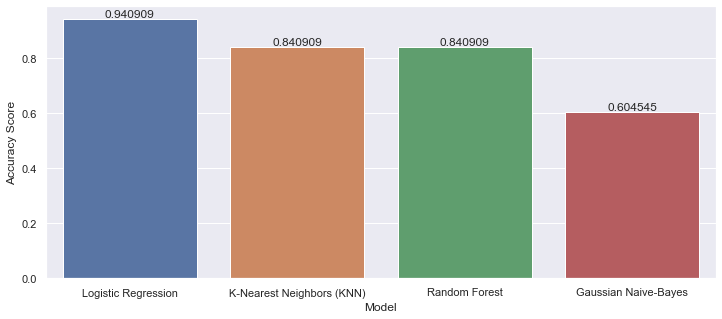

In [52]:
sns.set(rc = {'figure.figsize':(12,5)}) # Sets the size of the bar graph.

# Generates a bar graph of the Accuracy scores for each model, and sorts the values in desecending order.
ax = sns.barplot(x='Model', y='Accuracy Score', data=model_accuracies_df, order=model_accuracies_df.sort_values('Accuracy Score', ascending=False).Model) 

for label in ax.containers: # Iterates through each data label.
    ax.bar_label(label) # Displays the data label on each bar.

A bar graph of the **F1 scores** was generated.

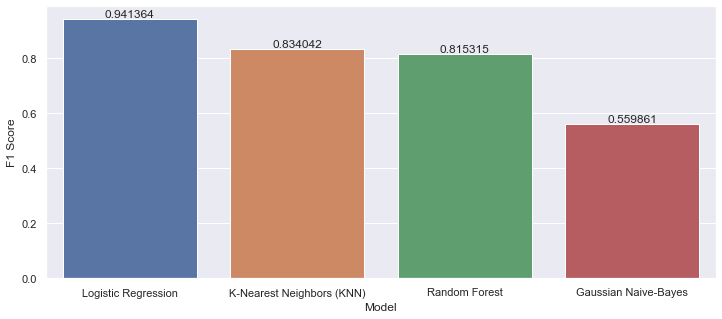

In [53]:
sns.set(rc = {'figure.figsize':(12,5)}) # Sets the size of the bar graph.

# Generates a bar graph of the F1 scores for each model, and sorts the values in desecending order.
ax = sns.barplot(x='Model', y='F1 Score', data=model_accuracies_df, order=model_accuracies_df.sort_values('F1 Score', ascending=False).Model) 

for label in ax.containers: # Iterates through each data label.
    ax.bar_label(label) # Displays the data label on each bar.

A bar graph of the **Jaccard scores** was generated.

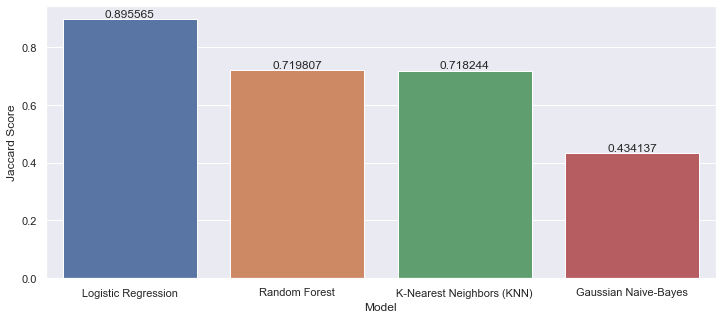

In [54]:
sns.set(rc = {'figure.figsize':(12,5)}) # Sets the size of the bar graph.

# Generates a bar graph of the Jaccard scores for each model, and sorts the values in desecending order.
ax = sns.barplot(x='Model', y='Jaccard Score', data=model_accuracies_df, order=model_accuracies_df.sort_values('Jaccard Score', ascending=False).Model)

for label in ax.containers: # Iterates through each data label.
    ax.bar_label(label) # Displays the data label on each bar.

The models were saved in the **models** directory of the project.

In [55]:
def save_models(base_path):
    '''Saves the models in the specified path.'''
    if models.models: # Checks if there are any models in the "models" attribute in the "models" instance.
        for name, model in models.models.items(): # Iterates through each name and model in the "models" attribute in the "models" instance.
            model_name = name + '.sav' # Adds the ".sav" extension to the model name.
            model_path = os.path.join(base_path, model_name) # Joins the base path to the model name.
            # Displays a message stating that the model is being saved in the specified directory.
            print(f'Saving \"{model_name}\" in the \"{base_path}\" directory...') 
            pickle.dump(model, open(model_path, 'wb')) # Saves the model in the directory.
    else:
        print('No models were created.') # Displays a message stating that no models were created.

In [56]:
base_path = 'models' # Path to store the models.

if os.path.exists(base_path): # Checks if the specified path exists.
    save_models(base_path) # Calls the "save_models" function to save the models in the specified directory.
else:
    print(f'The \"{base_path}\" directory does not exist.') # Displays a message stating that the directory does not exist. 
    print(f'Creating the \"{base_path}\" directory...') # Displays a message stating that the directory is being created.
    os.mkdir(base_path) # Creates the directory.
    print(f'\"{base_path}\" directory successfully created...\n') # Displays a message stating that the "models" directory has been successfully created.
    
    save_models(base_path) # Calls the "save_models" function to save the models in the specified directory.

Saving "k_nearest_neighbor.sav" in the "models" directory...
Saving "logistic_regression.sav" in the "models" directory...
Saving "random_forest.sav" in the "models" directory...
Saving "gaussian_naive_bayes.sav" in the "models" directory...


## DISCUSSION <a class="anchor" id="discussion">

The following models were created : **K-Nearest Neighbor (KNN)**, **Logistic Regression**, **Random Forest**. **Gaussian Naive-Bayes** and **Multilayer Perceptron (MLP)**. The Scikit-Learn library was used for creating the models, since it is one of the most popular and easiest libraries for implementing machine learning models. These models were selected for the project, since they are some of the most popular classification models, with a lot of different applications.

Hyperparameter tuning was performed on each of the model using the **GridSearchCV** object in the Sckit-Learn library, and the following accuracy metrics were calculated and compared: Accuracy Score, F1 Score and Jaccard Score. 

After calculating the accuracy metrics for each of the models, it was determined that the **Logistic Regression** model was the most accurate model with an accuracy score of 94 %, an F1 score of 94 % and a Jaccard score of 89 %, followed by the **Multilayer Perceptron**, **K-Nearest Neighbor**, **Random Forest** and **Gaussian Naive-Bayes** in that order.

**Precautions:**
* The dataset was downloaded from a credible source ([here](https://data.mendeley.com/datasets/bhmdr45bh2/1))
* All of the images in the dataset were in the same format (i.e. JPG) and had the same dimensions (i.e. 512 pixels by 512 pixels)

**Limitations:**
* There are only 1097 images in the dataset, which may be insufficient for creating a model for production.
* Before training the models, the images were resized to a dimension of 32 pixels by 32 pixels, which could have affected the accuracy of the models. This was done to reduce the training times of the models.

## CONCLUSION <a class="anchor" id="conclusion">

The **Logistic Regression** model was the most accurate model with an accuracy score of 94 %, an F1 score of 94 % and a Jaccard score of 89 %, followed by the **Multilayer Perceptron**, **K-Nearest Neighbor**, **Random Forest** and **Gaussian Naive-Bayes** in that order.

## REFERENCES<a class="anchor" id="references">

[1] <a class="anchor" id="1"></a> https://my.clevelandclinic.org/health/diseases/4375-lung-cancer

[2] <a class="anchor" id="2"></a> https://www.cancer.org/cancer/lung-cancer/detection-diagnosis-staging/how-diagnosed.html

## APPENDIX<a class="anchor" id="appendix">

* [Lung Cancer Dataset](https://data.mendeley.com/datasets/bhmdr45bh2/1)

* [Scikit-Learn Supervised Learning Documentation](https://scikit-learn.org/stable/supervised_learning.html)